In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


# Context

***STAKEHOLDER*** : King Property Services (property managment company)

***BUSINESS PROBLEM*** : Property management company is creating a new campaign that will target recent college graduates from local universities 
- The company knows this demographic will not be able to afford expensive properties 
    - Will be looking for smaller / less expensive places
    - Will be looking for places with more sq footage to split amongst many tennants 
- The company wants to have a better idea of what kinds of properties they should be promoting among this demographic  

# Obtain / Scrub

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Initial Observations** 

1) Columns with null data:
- waterfront
- yr_renovated
- view

2) sqft_basement is a string when it should probably be an int or float 

3) date column is not in datetime 

In [4]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

Over 2,000 null values
- this data could be filled given the distribution of waterfront properties 
    - Initially I feel like 2,000 is too much to replace 

In [6]:
#replacing null values based on the existing distribution of data from 'waterfront'
waterfront_dist = df['waterfront'].value_counts(normalize=True)
waterfront_na = df['waterfront'].isna()

df.loc[waterfront_na,'waterfront'] = np.random.choice(waterfront_dist.index, size=len(df[waterfront_na]), p=waterfront_dist.values)

In [7]:
# no more null values
# df['waterfront'].isna().value_counts()

In [8]:
# new values
# df['waterfront'].value_counts()

In [9]:
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [10]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

Nearly 4,000 null values 
- a value of '0' indicates no renovations have taken place 
- 95% of houses have not recieved rennovations

In [12]:
ren_dist = df['yr_renovated'].value_counts(normalize=True)
ren_na = df['yr_renovated'].isna()

df.loc[ren_na,'yr_renovated'] = np.random.choice(ren_dist.index, size=len(df[ren_na]), p=ren_dist.values)

In [13]:
# no more null values
# df['yr_renovated'].isna().value_counts()

In [14]:
# new value distribution
# distributions have changed by the ten thousandth place 
# df['yr_renovated'].value_counts(normalize=True)

In [15]:
df['view'].isna().value_counts()

False    21534
True        63
Name: view, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21534 non-null  int64  
 11  grade          21534 non-null  int64  
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

### Cleaning sqft_basement

In [18]:
df[(df['sqft_basement'] == '?')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [19]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.594316
?         0.020990
600.0     0.010031
500.0     0.009706
700.0     0.009613
            ...   
784.0     0.000046
556.0     0.000046
274.0     0.000046
2350.0    0.000046
1245.0    0.000046
Name: sqft_basement, Length: 302, dtype: float64

454 rows have the value "?", which makes it impossible to convert to a float
- Based on the relevance of basements being used as living space for the target demographic, I will not drop this data
- I am going to continue by filling '?' with values with respect to the distribution of exisitng values 

In [20]:
# replacing all '?' values with NaN to make replacing easier
df['sqft_basement'].replace(to_replace = '?', value=np.NaN, inplace=True)

basement_dist = df['sqft_basement'].value_counts(normalize=True)
basement_na = df['sqft_basement'].isna()

df.loc[basement_na,'sqft_basement'] = np.random.choice(basement_dist.index, size=len(df[basement_na]), p=basement_dist.values)

In [21]:
# no null values
# df['sqft_basement'].isna().value_counts()


In [22]:
#checking new distribution
#df['sqft_basement'].value_counts(normalize=True)

In [23]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

### Dealing with Duplicates

Because each house has a unique id ('id'), any duplicates will make analysis more difficult

In [24]:
df.drop_duplicates('id', keep='last', inplace=True)

In [25]:
# checking 
#print(df.info())
# len(df['id'].unique())

While I assume the repeated id's are from houses being sold more than once, I do not believe this will be a feature that I will be investigating, so I am keeping the most recent sale of each duplicated house

### Creating lot15/living15 Comparison Columns

I think it will be helpful to better understand how a property's living/lot space relative to their 15 neighbor's spaces will affect price

In [26]:
df['rel_lot'] = df['sqft_lot'] - df['sqft_lot15']
df['rel_living'] = df['sqft_living'] - df['sqft_living15']

<AxesSubplot:xlabel='rel_lot', ylabel='price'>

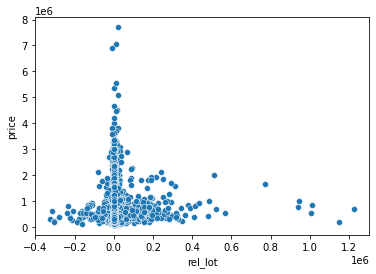

In [27]:
sns.scatterplot(x= 'rel_lot', y='price', data= df)

It would appear that the relative lot space does not any sort of linear relationship with price
- there are a seemingly equal ammount of houses that have negligible (close to 0) differences in lot sqftage that are valued from very low to very high ranges

<AxesSubplot:xlabel='rel_living', ylabel='price'>

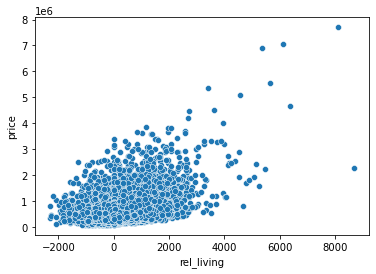

In [28]:
sns.scatterplot(x= 'rel_living', y='price', data= df)

It would appear that the relative living space has a negative linear relationship with price

### Checking Multicullinearity 

<AxesSubplot:>

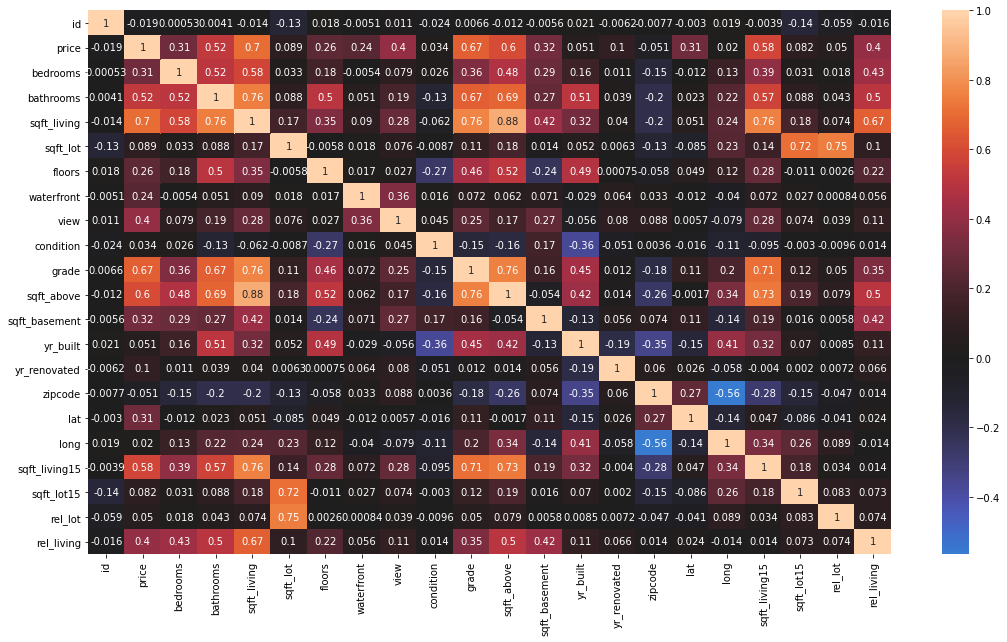

In [29]:
plt.figure(figsize=(18,10))
sns.heatmap(data = df.corr(), center=0, annot=True)

**Observations**
- sqft_above has a disruptive correlation (0.88)
    - I will be dropping sqft_above, considering sqft_living already takes the upstairs living space into account
- sqft_living has a correlation just above 0.75 with grade and sqft_living15
    - I will be dropping sqft_living15 as rel_living evaluates the same relationship 
    - I will not drop either sqft_living or grade as I believe they are both crucial for my model, and only surpass the threshold of 0.75 by 0.1
- Dropping rel_lot as it has a correlation of 0.75 with sqft_lot, and sqft_lot has a slightly higher correlation with price


In [30]:
df.drop('sqft_above', axis=1, inplace=True)
df.drop('sqft_living15', axis=1, inplace=True)
df.drop('rel_lot', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

# Explore 

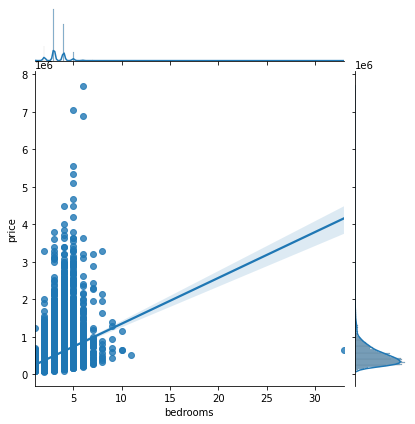

In [31]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')

I will need to investigate / remove the datapoint that has over 30 bedrooms

It would appear that the price of a property reaches its maximum at 5 bedrooms
- after that point it would appear the prices of properties begins to fall 

In [ ]:
df[(df['bedrooms'] > 30)]

33 bedrooms with onlh 1620 sqft living space
- I am going to delete this datapoint

In [ ]:
indexname = df[(df['bedrooms'] > 30)].index
df.drop(indexname, inplace=True)

In [ ]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')


11 bedrooms still seems unusual... but I will keep for now

In [ ]:
df.groupby('bedrooms').median()

In [ ]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')

In [ ]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')

In [ ]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

In [ ]:
df['grade'].value_counts()

There are very few datapoints for grades 3 and 13, it will probably be beneficial to remove these after the baseline 

In [ ]:
sns.jointplot(x='rel_living', y='price', data=df, kind='reg')

It would appear that as rel_living increases (as the difference between the living space of a property and the average of the the nearest 15 neighbors' living spaces increases) price also increases


### Baseline Model

In [ ]:
outcome = 'price'
predictors = df.drop('price', axis=1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables
model_baseline = ols(formula=formula, data=df).fit()
model_baseline.summary()

**Interpretation**
- Rsquared is already almost 0.7
- Baseline model seems to be moderately good at explaining variations in price 
- All variables seem to be be well below a = 0.05
- Negative coefficients:
    - bedrooms
        - For 1 addition bedroom price drops approx 36,500
        - this is counterintuitive... hopefully it will change as optimization occurs
    - sqft_basement
        - For 1 addition sqft of basement price drops approx 26
        - this is also counterintuitive 
    - yr_built
        - I can understand this being negative, if older houses being sold are larger / historical
    - sqft_lot15
        - very small negative coefficient
    - rel_living 
        - For every additional 1 sqft living space that a property has above the average livning space of its 15 neighbors, price decreses by 20
        - For every addional 1 sqft living space that a property has below the average living space of its 15 neighbors, price increases by 20
        - This is conflicting with sqft_living, which states that for every 1 additional sqft of living space, price increases by 202 


**Features to Drop**
- id (does not provide relevant information pertaining to price)

#### Baseline  Test

In [ ]:
X = df.drop("price", axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)




In [ ]:
baseline_linreg = LinearRegression()

baseline_linreg.fit(X_train, y_train)

y_pred = baseline_linreg.predict(X_test)

residuals = y_pred - y_test

In [ ]:
baseline_linreg.coef_

In [ ]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

residuals = model_baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))
print('Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train))
fig.show()

**Interpretation**
- Based on the QQ Plot the residuals do not follow a normal distribution
- I will be applying the assumptions based on the business problem to deal with extreme values / outliers 

# Adding Corresponding Cities to Zipcodes

Right now it will be much too difficult to have any meaningful geographical insights using zipcodes, lat, or long 
- 70 zipcodes is too much to include in the model
- long and lat is too vague

Using the 'All Zipcodes and PO Box as Centroids for King County / zipcode all point'.csv file (source below), I will be able to create a new column that will assign a corresponding city based on the zip code, greatly reducing the geogrpahical features in my model

source: https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::all-zipcodes-and-po-box-as-centroids-for-king-county-zipcode-all-point/about

### Initial Cleaning

In [ ]:
kc_zip = pd.read_csv('data/kc_zip.csv')

In [ ]:
kc_zip.info()

In [ ]:
kc_zip.drop(['X', 'Y', 'OBJECTID', 'ZIP', 'COUNTY', 'ZIP_TYPE', 'FEATURE_SOURCE'], axis=1, inplace=True )

kc_zip['zipcode'] = kc_zip['ZIPCODE']
kc_zip.drop('ZIPCODE', axis=1, inplace=True)

kc_zip['city'] = kc_zip['PREFERRED_CITY']
kc_zip.drop('PREFERRED_CITY', axis=1, inplace=True)

# kc_zip

In [ ]:
kc_zip[(kc_zip['city'] == 'SAMMAMIISH')]

In [ ]:
kc_zip.replace(to_replace='SAMMAMIISH', value='SAMMAMISH', inplace=True)

In [ ]:
zip_list = df['zipcode'].unique().tolist()
# len(zip_list)

In [ ]:
for index, contents in kc_zip.iterrows():
    if contents['zipcode'] not in zip_list:
        kc_zip.drop(labels=[index], inplace=True)
        
# kc_zip

In [ ]:
kc_zip.duplicated().sum()

In [ ]:
kc_zip.drop_duplicates(keep='first', inplace=True)

In [ ]:
merged = pd.merge(df, kc_zip, how='left')

# merged

In [ ]:
merged['city'].value_counts(normalize=True)

40% of properties in data set are within Seattle 

In [ ]:
merged.shape[0] - df.shape[0]

In [ ]:
merged.duplicated().sum()

In [ ]:
merged.shape

In [ ]:
merged.isna().sum()

In [ ]:
merged['city'] = merged['city'].str.replace(' ', '_')

# merged

### Exploring Cities 

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

- A lot of outliers
- I think it will be beneficial exploring the behavior of my model by removing more outliers 
- I think I will create another model with all categories including cities to see how they change relationships of other features 

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='city', y = 'price', data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

The top 3 most expensive cities to live in are Medina, Mercer Island, and Bellevue
- all of which are neighboring eachother 
- all of which are touching Lake Washington 

In [ ]:
merged.groupby('city')['waterfront'].sum()

- Despite bordering Lake Washington, Medina (the most expensive city) only has one property listed as waterfront 
- Seattle has the most waterfront properties, but also contains nearly half of all the properties within the dataset

In [ ]:
merged['city'].value_counts()

All cities have ample enough datapoints that will be sufficient for modeling

In [ ]:
merged['city'].value_counts(normalize=True)

40% of properties in data set are within Seattle 

# Creating Summary / Split Test Functions

Creating summary and tt_split functions to save myself tedious / repetitive coding

In [ ]:
def summary(df, preds): # predictors must be str
    outcome = 'price'
    predictors = preds
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    global model 
    model = ols(formula=formula, data=df).fit()
    return model.summary()

In [ ]:
def tt_split(df, preds):
    X = preds
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
    
    baseline_linreg = LinearRegression()
    baseline_linreg.fit(X_train, y_train)
    y_pred = baseline_linreg.predict(X_test)
    residuals = y_pred - y_test
    
    mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    
    return print('Train MSE:', np.sqrt(mse_train), '\n'
                'Test MSE:', np.sqrt(mse_test), '\n'
                'Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train)), fig.show();

# Baseline with Cities (Model 2) 

### Cleaning 

#### Defining/ Calculating "Affordable"

It is safe to assume that recent college graduates will not be looking to purchase a home, but the only available data regarding price is the entire price of the property

To account for this the following measures have been taken: 
- An 'affordable' rent (for a single individual living alone) has been defined as <= 1,146 USD (2015 median rent in King County)
    - source : https://www.deptofnumbers.com/rent/washington/king-county/
- Given the 2015 King County 'affordable rent' value, the median of house price (450,000 USD) will be the maximum threshold for "affordable"
- Given that recent college graduates often live with multiple roommates, I will be assuming the potential for having 3 tennants for a property 
    - Given this assumption, I will not be looking at houses priced over 1,350,000 USD (3x the median price) 


In [ ]:
cities_baseline = df[(df['price'] <= 1350000)]

In [ ]:
cities_baseline.groupby('bedrooms').median()

In [ ]:
cities_baseline = cities_baseline[(cities_baseline['bedrooms'] < 8)]

There is an extreme outlier (33 bedrooms)
- Considering the target demographic is recent graduates, any house with more than 7 bedrooms will be extravogant 
    - 5 and more is still extravogant, however I do not want to remove too many datapoints

In [ ]:
cities_baseline = cities_baseline[(cities_baseline['bathrooms'] > 0.5)]

Removing any datapoints with anything less than .75 bathrooms, as anything less would be uninhabitable 

In [ ]:
cities_baseline = pd.merge(cities_baseline, kc_zip, how='left')
 # cities_baseline.info()

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= cities_baseline)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

There are still many outliers, however I believe this to be representative of property prices and I will not be removing them
- In a given city / neighborhood there are properties with much higher prices due to a variety of different factors (historical significance, rennovations, waterfront status, architecture, etc.) 
- A model that could not take these outliers into account will be of no use 

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='city', y = 'price', data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

No change in most expensive cities 

In [ ]:
cities_baseline['city'] = cities_baseline['city'].str.replace(' ', '_')
city_dummies = pd.get_dummies(cities_baseline['city'], drop_first=True)

In [ ]:
cities_baseline = pd.concat([cities_baseline, city_dummies], axis=1)
cities_baseline.drop('city', axis=1, inplace=True)

In [ ]:
cities_baseline.info()

In [ ]:
cities_baseline.drop(['id', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

With 'city' being the most informative geographical feature, I am dropping 'zipcode', 'lat', and 'long'
- I am also dropping 'id' as it adds no relevant information to my model

In [ ]:
summary(cities_baseline, cities_baseline.drop('price', axis=1))

**Interpretation**
- Adding cities (and removing other geographical features) has improved the r-squared value significantly (up nearly 0.4 from baseline)
- Enumclaw appears to be the only city with a large p-value
- bedrooms still has a substantial negative coefficient
    - may need to propose this be looked into further 
- sqft_basement is still negative, but is much smaller
    - for every sqft of basement price only drops 4
- rel_living has a larger negative coefficient and is still conflicting with sqft_living



**Next Model** 
- I will be dropping 'condition' as it conveys the same information as 'grade'
    - 'grade' is a measure used by the local government, wheras 'condition' might be much more subjective 
- I am dropping rel_living due to its conflict with sqft_living
- Keeping Enumclaw for now despite p-value (0.405)
    - Considering the massive increase in r-squared by adding the cities, I want to see if tweaking other features will prove that all cities are significantly influential 
- Creating dummy variabels for grade

In [ ]:
tt_split(cities_baseline, cities_baseline.drop('price', axis=1))

**Interpretation**
- After filtering the data based on assumptions based on max price, number of bedrooms, and bathrooms, the residuals seem to be much more normally distributed than the baseline test

# Model 3

There is a strong positive relationship between 'grade' and 'price' 
 - Given there are 11 grades I will first create dummy variables, and then bin the grades based on their coeficients 

### Cleaning

In [ ]:
cities_baseline['grade'].value_counts()

There is a single datapoint where grade = 3

In [ ]:
indexnames = cities_baseline[cities_baseline['grade'] == 3].index
cities_baseline.drop(indexnames, inplace=True)

# Model 3 (cont'd)

In [ ]:
grade_dummies = pd.get_dummies(cities_baseline['grade'], prefix='grade', drop_first=True)
model4 = pd.concat([cities_baseline, grade_dummies], axis=1)
model4.drop(['grade', 'condition', 'rel_living'], axis=1, inplace=True)

In [ ]:
summary(model4, model4.drop('price', axis=1))

**Interpretation**
- sqft_basement now has a positive coefficient, but a very large p-value
    - I believe it will be beneficial to drop this feature as its coefficient and p-value has been fluxuating with each model 
- Enumclaw now has a much smaller p-value, but is still well above 0.05
- I will be binning grades 5-6, 7-8, 9-10, 11-12


In [ ]:
model4['grade'] = cities_baseline['grade']

In [ ]:
#binning
bins = [6,8,10,13]
model4['bin_grade'] = pd.cut(model4['grade'], bins)

# Cleaning what will become the column titles for each grade so as to not cause any
# problems when put into the model formula
model4['bin_grade'] = model4['bin_grade'].astype(str)
model4['bin_grade'] = model4['bin_grade'].str.replace(' ', '')
model4['bin_grade'] = model4['bin_grade'].str.replace('(', '')
model4['bin_grade'] = model4['bin_grade'].str.replace(']', '')
model4['bin_grade'] = model4['bin_grade'].str.replace(',', 'thru')
model4['bin_grade'] = model4['bin_grade'].str.replace('.0', '')

bin_dummies = pd.get_dummies(model4['bin_grade'], drop_first=True)
bin_dummies.drop('nan', axis=1, inplace=True)

# more cleaning column names to be more comprehendable / straightforward in summary 
bin_dummies['grade_9thru10'] = bin_dummies['8thru']
bin_dummies['grade_11thru12'] = bin_dummies['thru13']
bin_dummies.drop(['8thru', 'thru13'], axis=1, inplace=True)

# concatinating 
model4 = pd.concat([model4, bin_dummies], axis=1)

#dropping redundant columns
model4.drop(['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 
             'grade_12', 'sqft_basement', 'grade', 'bin_grade'], axis=1, inplace=True)

In [ ]:
# # binning 
# bins = [4,6,8,10,13]
# model4['bin_grade'] = pd.cut(model4['grade'], bins)

# # Cleaning what will become the column titles for each grade so as to not cause any
# # problems when put into the model formula
# model4['bin_grade'] = model4['bin_grade'].astype(str)
# model4['bin_grade'] = model4['bin_grade'].str.replace(' ', '')
# model4['bin_grade'] = model4['bin_grade'].str.replace('(', '')
# model4['bin_grade'] = model4['bin_grade'].str.replace(']', '')
# model4['bin_grade'] = model4['bin_grade'].str.replace(',', 'thru')
# model4['bin_grade'] = model4['bin_grade'].str.replace('.0', '')

# bin_dummies = pd.get_dummies(model4['bin_grade'], drop_first=True)
# bin_dummies.drop('nan', axis=1, inplace=True)

# # more cleaning column names to be more comprehendable / straightforward in summary 
# bin_dummies['grade_7thru8'] = bin_dummies['6thru8']
# bin_dummies['grade_9thru10'] = bin_dummies['8thru']
# bin_dummies['grade_10thru12'] = bin_dummies['thru13']
# bin_dummies.drop(['6thru8', '8thru', 'thru13'], axis=1, inplace=True)

# # concatinating 
# model4 = pd.concat([model4, bin_dummies], axis=1)

# #dropping redundant columns
# model4.drop(['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 
#              'grade_12', 'sqft_basement', 'grade', 'bin_grade'], axis=1, inplace=True)

In [ ]:
summary(model4, model4.drop('price', axis=1))

# Model 4 

In [ ]:
model4['view'] = model4.view.astype(str)

In [ ]:
model4['view'] = model4['view'].str.replace('.0', '')

In [ ]:
model4['view'].value_counts()

In [ ]:
view_dummies = pd.get_dummies(model4['view'], prefix='view', drop_first=True)

In [ ]:
model4 = pd.concat([model4, view_dummies], axis=1)

In [ ]:
model4.drop('view', axis=1, inplace=True)

In [ ]:
summary(model4, model4.drop('price', axis=1))

In [ ]:
summary(model4, model4.drop(['price', 'FEDERAL_WAY', 'sqft_lot15', 'ENUMCLAW'], axis=1))

In [ ]:
tt_split(model4, model4.drop('price', axis=1))

**Interpretation**
- 'Bedrooms' still has a negative coefficient after all attempts at optimization 

In [ ]:
tt_split(model4, model4.drop('price', axis=1))

### Exploring Bedrooms

In [ ]:
sns.boxplot(x='bedrooms', y='price', data=model4)

In [ ]:
sns.jointplot(x='bedrooms', y='price', data=model4, kind='reg')

Based on the seemingly positive relationship between bedrooms and price in these visualizations it is difficult to discern what is causing the negative coefficient in all of the models

In [ ]:
model4['bedrooms'].value_counts(normalize=True)

nearly 80% of the properties have either 3 or 4 bedrooms, whereas 6 and 7 bedrooms make up approx 2%
- perhaps only analyzing properties properties with 1 - 5 bedrooms will adjust the coefficient 

In [ ]:
model4.groupby('bedrooms').median()

It would appear that after 6 bedrooms, price no longer increases with the addition of an extra bedroom

In [ ]:
model5 = model4[(model4['bedrooms'] < 6)]

In [ ]:
summary(model5, model5.drop('price', axis=1))

Only a small change to the negative coefficient
- I will acknowledge this relationship and the need to expore it further in the 'going forward' section of my presentation

In [ ]:
df_model12 = df_model11.drop(['grade_5', 'grade_6'], axis=1)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

In [ ]:
df_model12 = pd.concat([df_model12, grade_col], axis=1)

In [ ]:
bins = [6,8,13]
df_model12['bin_grade'] = pd.cut(df_model12['grade'], bins)

In [ ]:
df_model12['bin_grade'].isna().sum()

In [ ]:
df_model12['bin_grade'].value_counts()

In [ ]:
df_model12['bin_grade'] = df_model12['bin_grade'].astype(str)
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('.0', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(' ', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('(', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(']', '')


In [ ]:
grade_bin_dummies = pd.get_dummies(df_model12['bin_grade'], drop_first=True)
df_model12 = pd.concat([df_model12, grade_bin_dummies], axis=1)
df_model12.drop(['nan', 'bin_grade'], axis=1, inplace=True)

In [ ]:
df_model12['grade_9thru13'] = df_model12['8,13']
df_model12.drop(['8,13', 'grade', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axis=1, inplace=True)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

In [ ]:
tt_split(model4, model4.drop('price', axis=1))

# Model 3

In [ ]:
df_model3 = df_model2

In [ ]:
df_model3.describe()

**Outliers**
- Max 33 bedrooms is an extreme outlier
- Min 0.5 bathroom seems to be a mistake

In [ ]:
df_model3['bedrooms'].value_counts()

- 33 Bedrooms is certianly a mistake
- Based on my business problem, I do not believe recent graduates will be looking for houses with over 7 bedrooms
    - I do not believe recent graduates would be looking at anything with more than 5 bedrooms, but for the sake of keeping data I will only prune bedrooms > 7
    - this will remove 51 datapoints

In [ ]:
df_model3 = df_model3[(df_model3['bedrooms'] < 8)]

In [ ]:
df_model3[(df_model3['bathrooms'] < 0.75)]

- I am making the assumption that any property with less than .75 bathroom (sink, bath/shower, toilet) is not a feasible living space 

In [ ]:
df_model3= df_model3[(df_model3['bathrooms'] > 0.5)]

In [ ]:
summary(df_model3, df_model3.drop('price', axis=1))

**Interpretation**
- With nearly identical results to model 2, the removed 'outliers' have had little positive change on the fit of the model
    - that being said rsquared = .708 is not terrible
- sqft_basement p value has increased by 0.1, so I will be dropping it for the next model

In [ ]:
tt_split(df_model3, df_model3.drop('price', axis=1))

- MSEs of Train and Test samples are very close (0.7%)
    - this is not a large change from model 2 (1%)

# Model 4

Removing 'sqft_basement'

In [ ]:
df_model4 = df_model3

In [ ]:
df_model4.drop('sqft_basement', axis=1, inplace=True)

In [ ]:
summary(df_model4, df_model4.drop('price', axis=1))

In [ ]:
tt_split(df_model4, df_model4.drop('price', axis=1))

# Model 5

**Steps Taken For New Model**
- Create dummy variables for categorical data
- Remove 'condition' column (conveys same information as 'grade')

In [ ]:
df_model5 = df_model4.drop('condition', axis=1)

In [ ]:
df_model5['view'] = df_model5['view'].astype(int)

In [ ]:
view_dummies = pd.get_dummies(df_model5['view'], prefix = 'view_', drop_first=True)
grade_dummies = pd.get_dummies(df_model5['grade'], prefix = 'grade_', drop_first=True)

In [ ]:
df_model5 = pd.concat([df_model5, view_dummies, grade_dummies], axis=1)

In [ ]:
df_model5.drop(columns=['view', 'grade'], inplace=True)

In [ ]:
summary(df_model5, df_model5.drop('price', axis=1))

In [ ]:
tt_split(df_model5, df_model5.drop('price', axis=1))

# Model 6

In [ ]:
df_model6 = df_model5.drop(['grade__4', 'grade__5', 'grade__6', 'grade__7', 'grade__8', 'grade__9', 'grade__10'], axis=1)

In [ ]:
summary(df_model6, df_model6.drop('price', axis=1))

In [ ]:
tt_split(df_model6, df_model6.drop('price', axis=1))

In [ ]:
df_model7 = df_model6.drop('grade__12', axis=1)

In [ ]:
summary(df_model7, df_model7.drop('price', axis=1))

In [ ]:
tt_split(df_model7, df_model7.drop('price', axis=1))

# Model 8

In [ ]:
df_model8 = merged

In [ ]:
city_dummies = pd.get_dummies(df_model8['city'], drop_first=True)
df_model8 = pd.concat([df_model8, city_dummies], axis=1)
df_model8.drop('city', axis=1, inplace=True)

In [ ]:
df_model8.info()

In [ ]:
summary(df_model8, df_model8.drop('price', axis=1))

# Model 9

In [ ]:
df_model9 = df_model8.drop(['VASHON', 'WOODINVILLE', 'sqft_lot15', 'zipcode', 'lat', 'long'], axis=1)

In [ ]:
summary(df_model9, df_model9.drop('price', axis=1))

In [ ]:
tt_split(df_model9, df_model9.drop('price', axis=1))

The MSE of the training data is higher than the testing data

In [ ]:
df_model9.info()

# Model 10

In [ ]:
df_model10 = cities_baseline.drop('condition', axis=1)

In [ ]:
indexnames = df_model10[(df_model10['grade'] == 3)].index
df_model10 = df_model10.drop(indexnames)

#creating for later concatination 
grade_col = df_model10['grade']
view_col = df_model10['view']

'grade' = 3 offered little / confusing information for the model as there was only one corresponding datapoint

In [ ]:
df_model10['view'] = df_model10['view'].astype(int)

view_dummies = pd.get_dummies(df_model10['view'], prefix='view', drop_first=True)

grade_dummies = pd.get_dummies(df_model10['grade'], prefix='grade', drop_first=True)

In [ ]:
df_model10.drop(['view', 'grade'], axis=1, inplace=True)

In [ ]:
df_model10 = pd.concat([df_model10, view_dummies, grade_dummies], axis=1)

In [ ]:
summary(df_model10, df_model10.drop('price', axis=1))

In [ ]:
tt_split(df_model10, df_model10.drop('price', axis=1))

# Model 11

In [ ]:
df_model11 = df_model10.drop(['ENUMCLAW', 'sqft_basement'], axis=1)

In [ ]:
summary(df_model11, df_model11.drop('price', axis=1))

# Model 12

There is a strong positive relationship between 'grade' and 'price' so I do not want to drop a majority of the 'grade' columns... so I will attempt binning 

In [ ]:
# df_model12 = cities_baseline.drop('condition', axis=1)

In [ ]:
df_model12 = df_model11.drop(['grade_5', 'grade_6'], axis=1)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

In [ ]:
df_model12 = pd.concat([df_model12, grade_col], axis=1)

In [ ]:
bins = [6,8,13]
df_model12['bin_grade'] = pd.cut(df_model12['grade'], bins)

In [ ]:
df_model12['bin_grade'].isna().sum()

In [ ]:
df_model12['bin_grade'].value_counts()

In [ ]:
df_model12['bin_grade'] = df_model12['bin_grade'].astype(str)
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('.0', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(' ', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('(', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(']', '')


In [ ]:
grade_bin_dummies = pd.get_dummies(df_model12['bin_grade'], drop_first=True)
df_model12 = pd.concat([df_model12, grade_bin_dummies], axis=1)
df_model12.drop(['nan', 'bin_grade'], axis=1, inplace=True)

In [ ]:
df_model12['grade_9thru13'] = df_model12['8,13']
df_model12.drop(['8,13', 'grade', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axis=1, inplace=True)

In [ ]:
summary(df_model12, df_model12.drop('price', axis=1))

### Exploring Date

In [ ]:
df['date'].value_counts()


It would appear that the bulk of sales are happening in June
- seems as though sales are from 2014 and 2015

In [ ]:
sns.countplot(x=df['month'])

Most properties are being bought/sold between April - July
- Highest frequency = May 

In [ ]:
sns.barplot(x='month', y='price', data= df.groupby(df['month']).median().reset_index())

While more houses are being bought/sold during April - July, there does not seem to be a large difference between the median prices of houses sold on a month to month basis

In [ ]:
sns.boxplot(x=df['month'], y=df['price'])

The 'price' column seems to be riddled with outliers
- Outliers seem to begin around $100mil
- This will be influential when testing residuals for normality 

### Exploring sqft_basement

In [ ]:
sns.scatterplot(x= df['sqft_basement'], y = df['price'])

In [ ]:
basement_grouped = df.groupby('sqft_basement').median().reset_index()

In [ ]:
sns.barplot(x = basement_grouped['sqft_basement'], y = basement_grouped['price'])
sns.set(rc={'figure.figsize':(18,12)})


There seems to be a positive relationship between sqft_basement and price

In [ ]:
only_basements = df[df.sqft_basement != 0]

In [ ]:
sns.scatterplot(x= only_basements['sqft_basement'], y = only_basements['price'])

### Exploring lat/long/zipcode 

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], hue = df['price'])

Comparing this plot ot a map of King County, the lat and long data seems to be quite accurate 

**Observations**
- Most expensive properties are in the North (above lat = 47.5)
- Many of the higher priced properties appear to be clustered around bodies of water (Lake Washington, Lake Sammamish, Elliot Bay, Lake Union, etc.)
- The most Eastward properties are much less expensive, but are located approx 60 miles outside of Seattle (1.5 hour drive)

In [ ]:
zip_grouped = df.groupby('zipcode').median().reset_index()

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], hue = df['zipcode'], palette = 'bright')

There are a lot of zipcodes... I don't know if it'll be worth the time aggregating them into larger groups 
- It might be better to create 4-8 geographical areas based on long and lat 

### Exploring yr_built

In [ ]:
new_properties = df.groupby('yr_built').median().reset_index()


In [ ]:
new_properties

The data consists of properties that were built each year from 1900 to 2015

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'price', data= new_properties)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
cheap_yrs = new_properties[(new_properties['yr_built'] >= 1930) & (new_properties['yr_built'] <= 1973)]

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'price', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


Houses built 1932 - 1936 and 1942 - 1944 appear to have the lowest (median) prices 

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'grade', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

The grade lower grade of the houses built 1932 - 1936 and 1942 - 1944 seem to reflect their lower prices

In [ ]:
ax = sns.countplot(x = 'grade', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
df['grade'].value_counts()

In [ ]:
over_1945 = new_properties[(new_properties['yr_built'] > 1945)]

ax = sns.barplot(x = 'yr_built', y ='grade', data= over_1945)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:

ax = sns.barplot(x = 'yr_built', y ='price', data= over_1945)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
zip_grouped[['zipcode', 'yr_built']]

In [ ]:
oldest_zip = zip_grouped[(zip_grouped['yr_built'] == 1926)] 

In [ ]:
oldest_zip

In [ ]:
new_zip = zip_grouped.sort_values(by='price', ascending=False).reset_index()

In [ ]:
new_zip[(new_zip['yr_built'] == 1926)]

"oldest" does not correspond with "cheapest", considering the two oldest zipcodes are within the top 10 most expensive zip codes

In [ ]:
cheapest_zips = new_zip.iloc[-10: -1].drop('index', axis=1)

In [ ]:
cheapest_zips

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], palette = 'bright')

In [ ]:
df[(df['zipcode'] == 98002)].sort_values(by='price', ascending=False)